In [1]:
# divide entities into time spans
import os, json, pickle, pprint
from matplotlib import pyplot as plt

In [2]:
# input: entities, journal/issue metadata
cm_entities = pickle.load(open("/home/rovera/cm/scripts/generators/generator_all_entities/cm_tagme_resource_reference_data_06_04.pickle", 'rb'))
page_meta = pickle.load(open("/data/cm/data/metadata/short_metadata/pages_by_year.pickle", 'rb'))

In [3]:
# in page_meta pages are represented as underscore separated strings, while in cm_entities as minus separated strings
# adapt representation
page_meta = {year: [page.replace('_', '-') for page in pages] for year, pages in page_meta.items()}

In [4]:
# and create inverted index page: year
page_meta_inv = {page: year for year, pages in page_meta.items() for page in pages}

In [5]:
cm_entities_by_decade = {year: [] for year in page_meta.keys()}

In [6]:
for mention in cm_entities:
    page = mention['page_id']
    year = None
    try:
        year = page_meta_inv[page]
    except KeyError:
        pass
    if year is not None:
        cm_entities_by_decade[year].append(mention)

In [7]:
temporal_distrib = {k: len(v) for k,v in cm_entities_by_decade.items()}

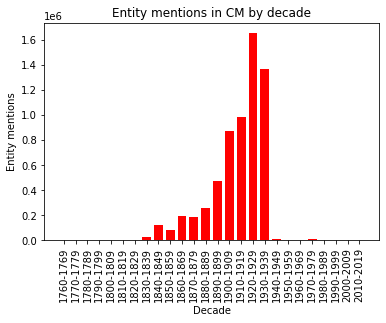

In [8]:
x = list(temporal_distrib.keys())
y = list(temporal_distrib.values())
x_lab = [str(year)+'-'+str(year+9) for year in temporal_distrib.keys()]

plt.bar(x, y, color='red', width=7.5)
plt.xlabel("Decade")
plt.ylabel("Entity mentions")
plt.title("Entity mentions in CM by decade")

plt.xticks(x, x_lab, rotation='vertical')

#plt.savefig("temporal_distribution.jpg", dpi=250, bbox_inches="tight")
plt.show()


In [14]:
pickle.dump(cm_entities_by_decade, open('/data/cm/data/cm_entities/all_entities/entities_by_decade.pickle', 'wb'))